### generating multivariate normal distributuon using numpy

In [ ]:
# iske liye ik mean vector chahiye aur ik covariance matrix

In [ ]:
# p(x)=e**((-1/2)*(x-u)T*sigma_inverse*(x-u))/(2*pi)**(m/2) * sigma**(1/2)

# here sigma is determinent of covariance matrix
# m is number of features

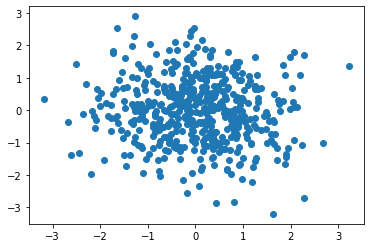

In [10]:
#bivariate(imagine mean is 0 for all features)(sigmaxy=0 i.e change in x has no effect on y)(x and y are independent of eachother)
import numpy as np
import matplotlib.pyplot as plt
mean=np.array([0.0,0.0])
cov=np.array([[1,0],[0,1]])
dist=np.random.multivariate_normal(mean,cov,500)
# dist
plt.scatter(dist[:,0],dist[:,1])

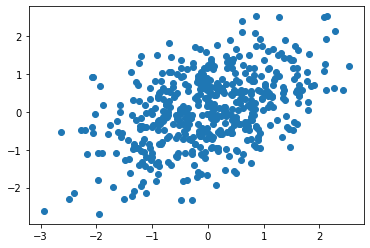

In [20]:
import numpy as np
import matplotlib.pyplot as plt
mean=np.array([0.0,0.0])
cov=np.array([[1,0.5],[0.5,1]])
dist=np.random.multivariate_normal(mean,cov,500)
# dist
plt.scatter(dist[:,0],dist[:,1])

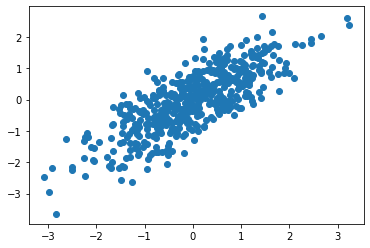

In [21]:
import numpy as np
import matplotlib.pyplot as plt
mean=np.array([0.0,0.0])
cov=np.array([[1,0.8],[0.8,1]])
dist=np.random.multivariate_normal(mean,cov,500)
# dist
plt.scatter(dist[:,0],dist[:,1])

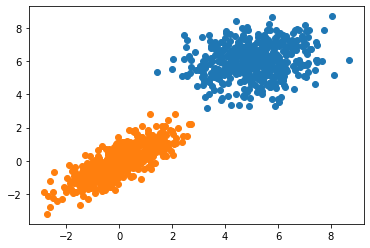

In [25]:
import numpy as np
import matplotlib.pyplot as plt
mean2=np.array([5.0,6.0])
cov2=np.array([[1.3,0.2],[0.2,1.1]])
dist2=np.random.multivariate_normal(mean2,cov2,500)
# dist
plt.scatter(dist2[:,0],dist2[:,1])
mean=np.array([0.0,0.0])
cov=np.array([[1,0.8],[0.8,1]])
dist=np.random.multivariate_normal(mean,cov,500)
# dist
plt.scatter(dist[:,0],dist[:,1])

### KNN IMPLEMENTATION

In [26]:
#FOR 2 DIMENSION 


def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,querypoint,k=5):
    val=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(querypoint,X[i])
        val.append([d,Y[i]])
        
    val=sorted(val)
    #first k points
    val=val[:5]
    
    val=np.array(val)
    new_val=np.unique(val[:,1],return_counts=True)
#     print(new_val)
    index=new_val[1].argmax()
    prediction=new_val[0][index]
    return prediction

In [28]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\KNN_on_MNIST_dataset\mnist_train.csv")

In [29]:
df.shape

(60000, 785)

In [33]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [34]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data=df.values

In [36]:
X=data[:,1:]
Y=data[:,0]

In [37]:
print(X.shape,Y.shape)

(60000, 784) (60000,)


In [39]:
split=int(0.8*X.shape[0])
print(split)
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

48000


In [40]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


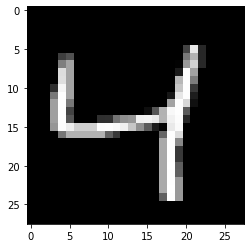

In [43]:
#VISUALIZATION
def draw(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
draw(X_train[2])

In [49]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,querypoint,k=5):
    val=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(querypoint,X[i])
        val.append([d,Y[i]])
        
    val=sorted(val)
    #first k points
    val=val[:5]
    
    val=np.array(val)
    new_val=np.unique(val[:,1],return_counts=True)
#     print(new_val)
    index=new_val[1].argmax()
    prediction=new_val[0][index]
    return prediction

## PREDICTION

In [79]:
pred=knn(X_train,Y_train,X_test[20])
print(int(pred))

9


4


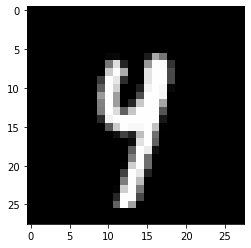

In [80]:
draw(X_test[20])
print(Y_test[20])

In [83]:
pred=knn(X_train,Y_train,X_test[1001])
print(int(pred))

9


4


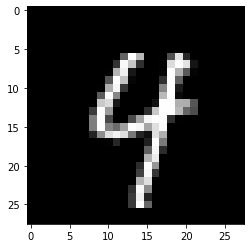

In [84]:
draw(X_test[1001])
print(Y_test[1001])

## COMUTING ACCURACY

In [69]:
y_pred=[]
for x in X_test[0:1166]:
    pred=knn(X_train,Y_train,x)
    y_pred.append(pred)

In [76]:
print(y_pred)
print(Y_test[0:1166])

[4.0, 7.0, 8.0, 8.0, 5.0, 6.0, 6.0, 8.0, 2.0, 2.0, 7.0, 8.0, 0.0, 4.0, 3.0, 4.0, 5.0, 2.0, 4.0, 2.0, 9.0, 8.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 8.0, 2.0, 9.0, 3.0, 6.0, 6.0, 2.0, 7.0, 9.0, 8.0, 3.0, 0.0, 1.0, 1.0, 9.0, 2.0, 1.0, 3.0, 5.0, 4.0, 4.0, 5.0, 7.0, 6.0, 6.0, 7.0, 6.0, 8.0, 4.0, 9.0, 5.0, 0.0, 8.0, 1.0, 8.0, 2.0, 3.0, 1.0, 6.0, 4.0, 4.0, 5.0, 7.0, 6.0, 9.0, 7.0, 1.0, 8.0, 3.0, 9.0, 5.0, 1.0, 7.0, 8.0, 6.0, 6.0, 4.0, 1.0, 6.0, 4.0, 3.0, 9.0, 6.0, 3.0, 8.0, 7.0, 5.0, 9.0, 7.0, 9.0, 7.0, 1.0, 7.0, 8.0, 9.0, 4.0, 8.0, 7.0, 8.0, 2.0, 7.0, 2.0, 8.0, 0.0, 1.0, 5.0, 6.0, 8.0, 6.0, 6.0, 2.0, 1.0, 4.0, 0.0, 7.0, 4.0, 7.0, 7.0, 1.0, 1.0, 0.0, 2.0, 9.0, 1.0, 5.0, 6.0, 5.0, 7.0, 0.0, 3.0, 8.0, 3.0, 8.0, 6.0, 0.0, 5.0, 7.0, 6.0, 7.0, 2.0, 9.0, 8.0, 8.0, 7.0, 6.0, 6.0, 3.0, 8.0, 6.0, 9.0, 2.0, 9.0, 8.0, 5.0, 8.0, 3.0, 3.0, 7.0, 7.0, 0.0, 0.0, 6.0, 7.0, 9.0, 4.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0, 3.0, 0.0, 2.0, 9.0, 1.0, 1.0, 0.0, 9.0, 0.0, 6.0, 1.0, 7.0, 2.0, 8.0, 3.0, 4.0, 4.0, 0.0, 5.0, 4.0, 6.0,

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test[0:1166], y_pred)

0.9485420240137221

## DIABETIES CLASSIFICATION

In [99]:
df=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\KNN_implementation\Diabetes_XTrain.csv")
df1=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\KNN_implementation\Diabetes_XTrain.csv")

In [91]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


## statistical analysis

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,3.758681,3.328783,0.000,1.00000,3.0000,6.00000,17.00
Glucose,576.0,119.975694,31.512914,0.000,99.00000,116.0000,139.00000,199.00
BloodPressure,576.0,68.826389,20.285812,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,576.0,20.364583,15.893856,0.000,0.00000,22.0000,32.00000,63.00
Insulin,576.0,76.166667,109.193550,0.000,0.00000,36.0000,120.00000,744.00
BMI,576.0,31.857292,8.134926,0.000,26.97500,32.0000,36.72500,67.10
DiabetesPedigreeFunction,576.0,0.481519,0.336910,0.078,0.24775,0.3815,0.64125,2.42
Age,576.0,32.954861,11.878137,21.000,24.00000,29.0000,40.00000,81.00


In [ ]:
#here min value is 0 for some feature which is equivalent to nan

In [100]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [101]:
df.isnull().sum()

Pregnancies                   0
Glucose                       3
BloodPressure                29
SkinThickness               171
Insulin                     278
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

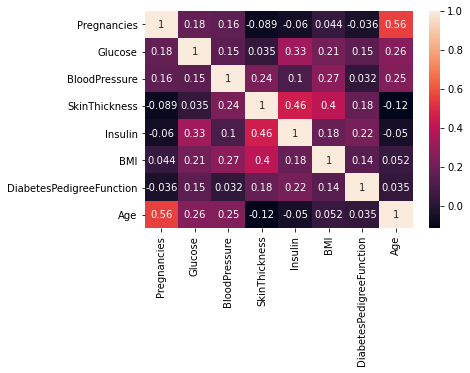

In [222]:
sns.heatmap(df1.iloc[:,:].corr(),annot=True)

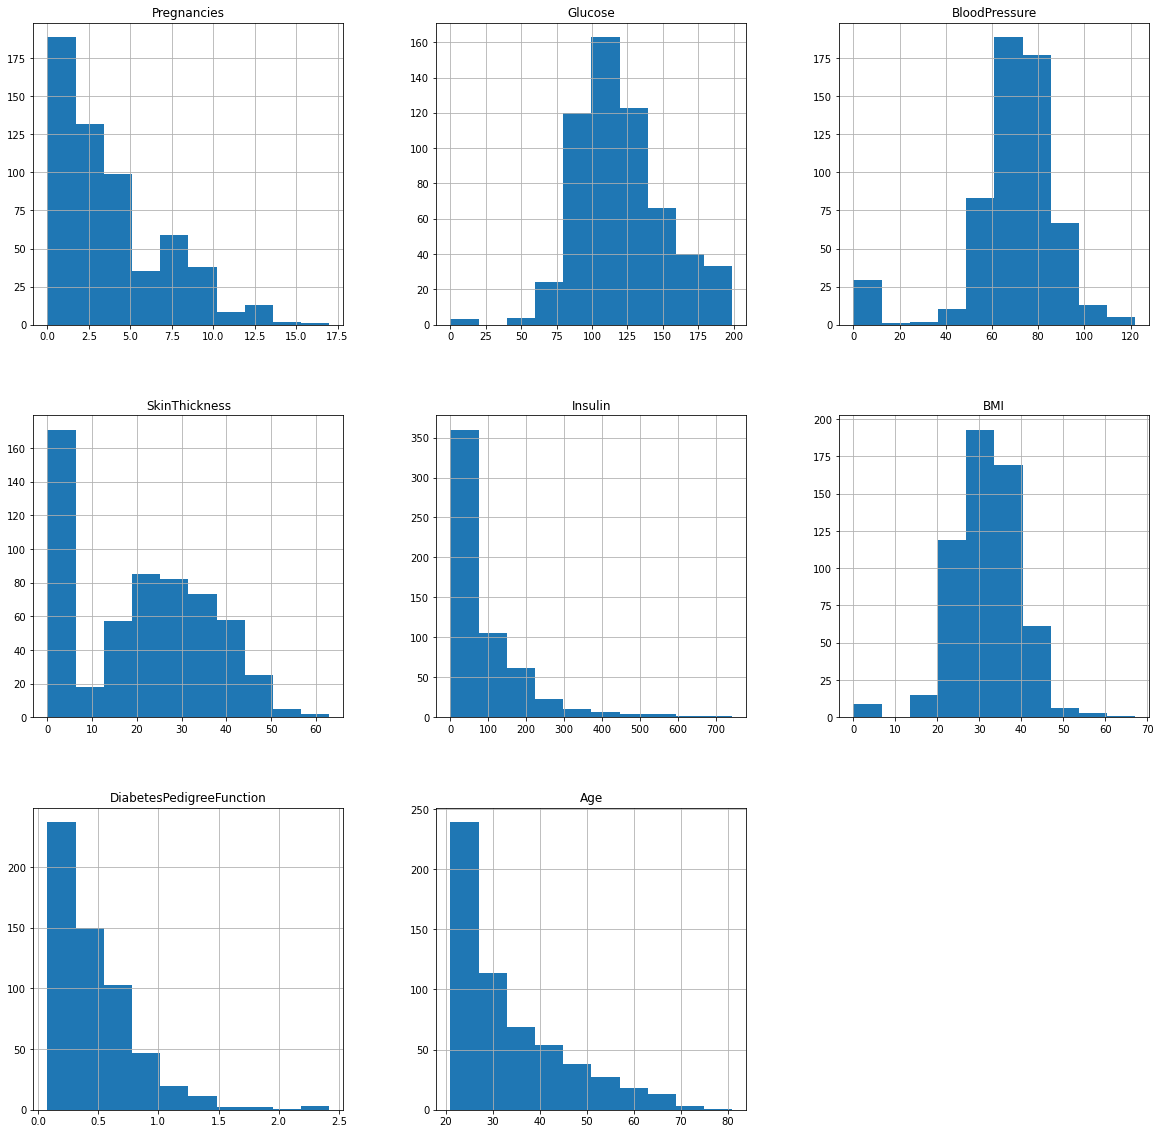

In [102]:
# To fill these Nan values the data distribution needs to be understood
p = df1.hist(figsize = (20,20))

In [ ]:
'Glucose'--mean
'BloodPressure'--mean
'SkinThickness'--median
'Insulin'--median
'BMI'--median

In [123]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [124]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168.0,88.0,42.0,321.0,38.2,0.787,40
1,8,110.0,76.0,29.0,115.0,27.8,0.237,58
2,7,147.0,76.0,29.0,115.0,39.4,0.257,43
3,2,100.0,66.0,20.0,90.0,32.9,0.867,28
4,4,129.0,86.0,20.0,270.0,35.1,0.231,23


In [126]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

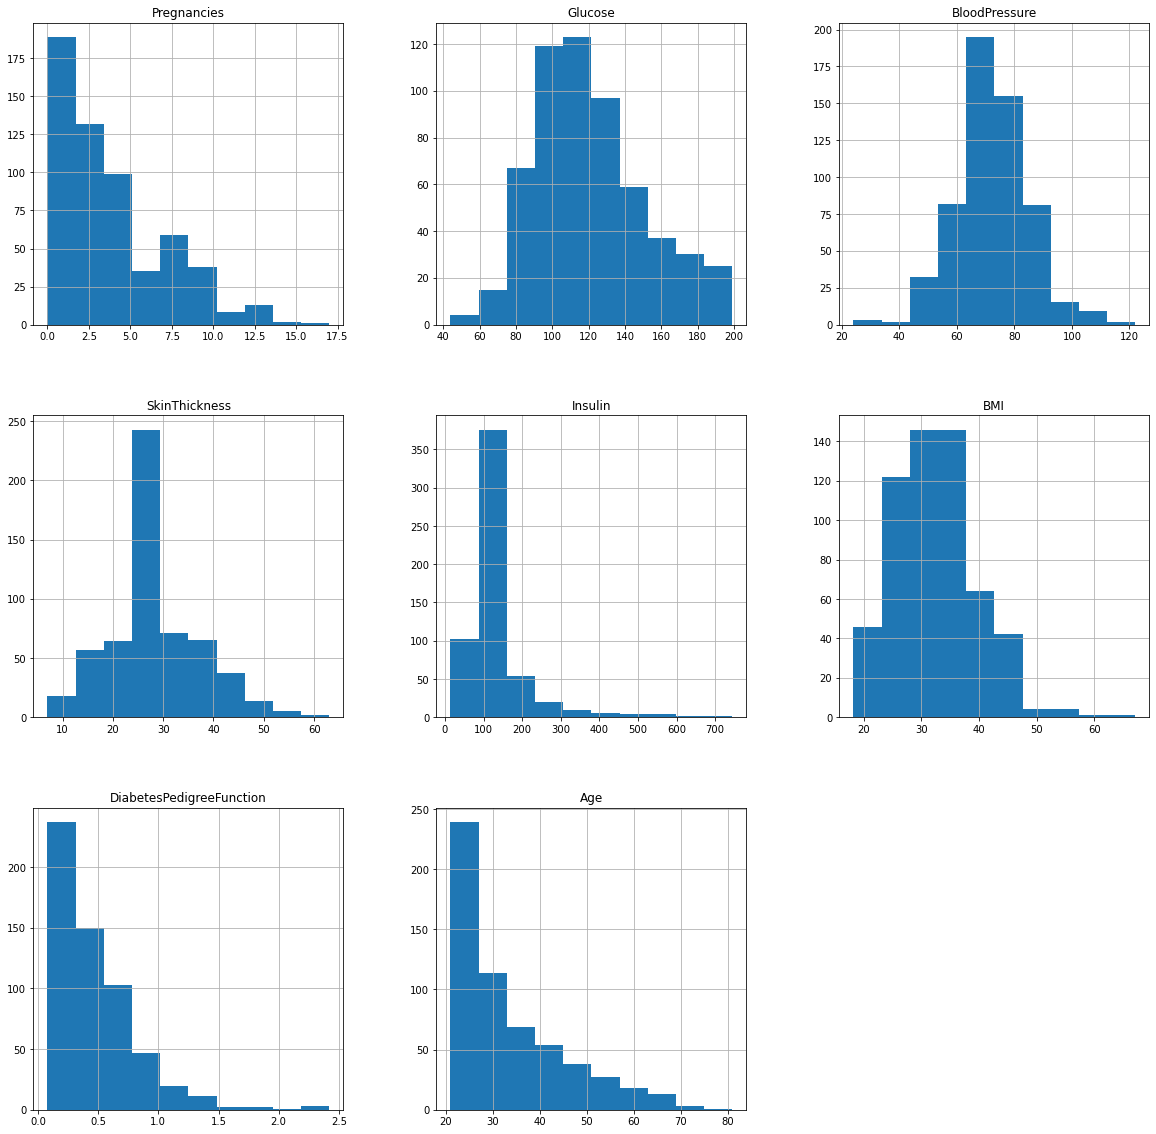

In [127]:
#after removal of NAN values
p = df.hist(figsize = (20,20))


In [128]:
df_label=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\KNN_implementation\Diabetes_YTrain.csv")

In [138]:
y_train=df_label['Outcome'].values
x_train=df.values
# print(y_train)
df_label.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


<AxesSubplot:xlabel='Outcome', ylabel='count'>

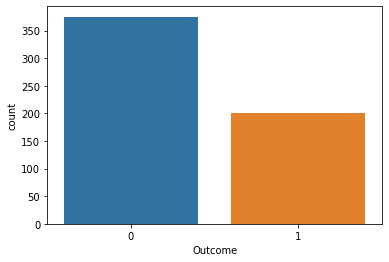

In [131]:
import seaborn as sns
sns.countplot(x='Outcome',data=df_label)

In [ ]:
# The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes 
# was not present actually.The number of non-diabetics is almost twice the number of diabetic patients

In [132]:
import imblearn
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter

0.8.0


In [141]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({1: 375, 0: 375})


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

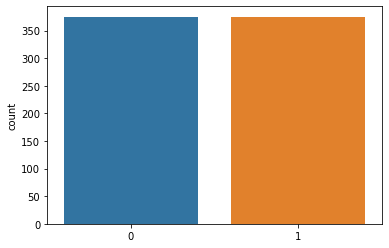

In [144]:
import seaborn as sns
sns.countplot(y_train)

In [145]:
x_train.shape

(750, 8)

In [153]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(x_train),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [154]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.909727,1.383764,1.215049,1.525567,2.250245,0.725895,0.851933,0.559349
1,1.213431,-0.484002,0.232985,-0.036884,-0.256950,-0.767441,-0.811079,2.142084
2,0.909727,0.707504,0.232985,-0.036884,-0.256950,0.898203,-0.750606,0.823139
3,-0.608794,-0.806031,-0.585401,-1.118581,-0.561222,-0.035132,1.093825,-0.495807
4,-0.001386,0.127852,1.051372,-1.118581,1.629532,0.280766,-0.829221,-0.935455


In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

In [192]:
k=np.sqrt(len(y_train))
k

27.386127875258307

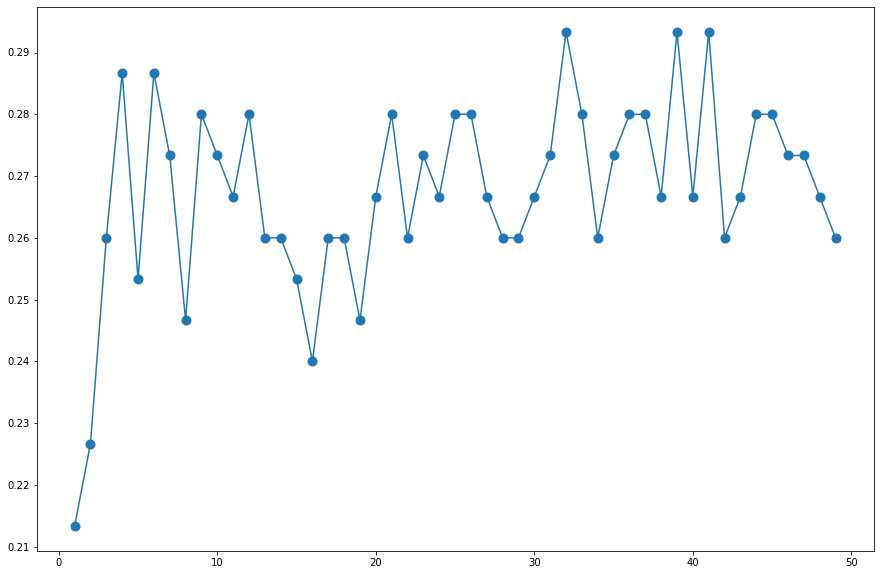

In [193]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != Y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [194]:
error_rate=np.array(error_rate)

In [195]:
k=error_rate.argmin()+1
k

1

In [207]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy_score(Y_test, y_pred)

0.7866666666666666

Text(0.5, 15.0, 'Predicted label')

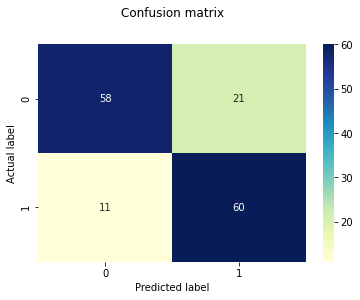

In [197]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### coding blocks test case

In [258]:
df_test=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\KNN_implementation\Diabetes_Xtest.csv")
x_train=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\KNN_implementation\Diabetes_XTrain.csv")
y_train=pd.read_csv(r"C:\Users\hp\Desktop\works\datascience\KNN_implementation\Diabetes_YTrain.csv")

In [209]:
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22
...,...,...,...,...,...,...,...,...
187,10,108,66,0,0,32.4,0.272,42
188,3,130,64,0,0,23.1,0.314,22
189,0,162,76,36,0,49.6,0.364,26
190,12,84,72,31,0,29.7,0.297,46


In [210]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,192.0,4.104167,3.485134,0.000,1.000,3.0000,6.2500,15.000
Glucose,192.0,123.651042,33.245684,0.000,101.500,120.0000,145.2500,198.000
BloodPressure,192.0,69.942708,16.269068,0.000,64.000,72.0000,78.5000,108.000
SkinThickness,192.0,21.052083,16.156868,0.000,0.000,25.5000,32.0000,99.000
Insulin,192.0,90.697917,131.451830,0.000,0.000,9.0000,140.5000,846.000
BMI,192.0,32.398437,7.083182,0.000,28.175,32.4000,36.1500,52.300
DiabetesPedigreeFunction,192.0,0.442948,0.313054,0.085,0.207,0.3465,0.5705,1.893
Age,192.0,34.098958,11.386388,21.000,25.000,30.0000,41.0000,69.000


In [211]:
df_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [212]:
df_test['Glucose'].fillna(df_test['Glucose'].mean(), inplace = True)
df_test['BloodPressure'].fillna(df_test['BloodPressure'].mean(), inplace = True)
df_test['SkinThickness'].fillna(df_test['SkinThickness'].median(), inplace = True)
df_test['Insulin'].fillna(df_test['Insulin'].median(), inplace = True)
df_test['BMI'].fillna(df_test['BMI'].median(), inplace = True)

In [213]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,192.0,4.104167,3.485134,0.000,1.000,3.0000,6.2500,15.000
Glucose,192.0,124.952632,30.716281,62.000,103.000,122.0000,145.2500,198.000
BloodPressure,192.0,72.198925,10.298081,44.000,64.000,72.0000,78.5000,108.000
SkinThickness,192.0,29.802083,8.809942,7.000,27.000,30.0000,32.0000,99.000
Insulin,192.0,161.197917,97.059233,18.000,140.750,141.0000,141.2500,846.000
BMI,192.0,32.735937,6.250262,21.000,28.375,32.4000,36.1500,52.300
DiabetesPedigreeFunction,192.0,0.442948,0.313054,0.085,0.207,0.3465,0.5705,1.893
Age,192.0,34.098958,11.386388,21.000,25.000,30.0000,41.0000,69.000


In [215]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test =  pd.DataFrame(sc_X.fit_transform(df_test),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [218]:
X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [219]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.180700,1.796809,1.733101,-0.432696,-0.735469,0.603799,-0.412980,0.079340
1,-0.605333,-1.042970,-0.798242,0.250134,-0.012374,0.844417,0.739987,-0.977305
2,-0.605333,-0.357506,-0.408805,-0.887915,-0.208643,-0.647411,-1.123976,-0.801198
3,2.559181,-1.597870,-1.187679,0.022524,-0.208643,0.010276,-0.842139,0.607663
4,-0.893016,-1.467305,0.175352,-2.139769,-1.045367,-0.438876,0.269192,-1.065359


In [276]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,querypoint,k):
    val=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(querypoint,X[i])
        val.append([d,Y[i]])
        
    val=sorted(val)
    #first k points
    val=val[:5]
    
    val=np.array(val)
    new_val=np.unique(val[:,1],return_counts=True)
#     print(new_val)
    index=new_val[1].argmax()
    prediction=new_val[0][index]
    return prediction

In [281]:
# y_pred=[]
# k=5
# X_test=np.array(df_test)
# for i in X_test:
#     pred=knn(x_train,y_train,i,k)
#     y_pred.append(pred)

In [246]:
y_pred.shape

(192,)

In [278]:
# from sklearn.metrics import accuracy_score

# knn = KNeighborsClassifier(n_neighbors=7)
# knn.fit(x_train, y_train)
# y_pred = knn.predict(df_test)
# print(y_pred)
# accuracy_score(Y_test, y_pred)

In [271]:
submit=pd.DataFrame(y_pred,columns=['Outcome'])
submit.to_csv("submit.csv",index=False)